In [2]:
# 📦 Install required libraries (run once per session)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn geopandas folium missingno

# ✅ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# 🌍 Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)


In [4]:
import pandas as pd

DATA_PATH = "/content/Pluvial_Flood_Dataset.xlsx"  # or your CSV path

# 1️⃣ If it's an Excel file
if DATA_PATH.endswith('.xlsx') or DATA_PATH.endswith('.xls'):
    df = pd.read_excel(DATA_PATH, engine='openpyxl')

# 2️⃣ If it's a CSV (try multiple encodings safely)
else:
    encodings = ['utf-8', 'latin1', 'cp1252', 'ISO-8859-1']
    for enc in encodings:
        try:
            df = pd.read_csv(DATA_PATH, encoding=enc)
            print(f"✅ Loaded successfully with encoding: {enc}")
            break
        except Exception as e:
            print(f"❌ Failed with {enc}: {e}")

print("\n✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head(3))



✅ Dataset Loaded Successfully!
Shape: (144401, 10)
       X      Y   Slope  Curvature   Aspect    TWI     FA  Drainage  Rainfall  \
0  3.909  7.443  46.686  -3.888e+09  45.000 -3.250  147.0   228.853   101.516   
1  3.909  7.443  52.152   1.296e+09  60.945 -4.314   61.0   229.678    80.410   
2  3.909  7.443  66.484   0.000e+00  67.620 -8.328    1.0   230.592    78.987   

      SUSCEP  
0  Very_High  
1  Very_High  
2  Very_High  


In [ ]:
#for normal csv files
DATA_PATH = "/content/Pluvial_Flood_Dataset.xlsx"

# Read the dataset
df = pd.read_csv(DATA_PATH)

# Display shape and first few rows
print("✅ Dataset Loaded:", DATA_PATH)
print("Shape:", df.shape)
display(df.head())


📘 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           144401 non-null  float64
 1   Y           144401 non-null  float64
 2   Slope       144119 non-null  float64
 3   Curvature   144401 non-null  float64
 4   Aspect      144401 non-null  float64
 5   TWI         144401 non-null  float64
 6   FA          144401 non-null  float64
 7   Drainage    144401 non-null  float64
 8   Rainfall    144401 non-null  float64
 9   SUSCEP      144401 non-null  object 
dtypes: float64(9), object(1)
memory usage: 11.0+ MB

📊 Descriptive Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,144401.0,NaN,NaN,NaN,3.892,0.028,3.831,3.869,3.892,3.914,3.954
Y,144401.0,NaN,NaN,NaN,7.375,0.032,7.311,7.348,7.374,7.4,7.443
Slope,144119.0,NaN,NaN,NaN,-250278758829947181520845277954572288.0,9225149552514225094056050891356635136.0,-340282306073709010266521665318265290752.0,51.058,61.98,69.167,86.575
Curvature,144401.0,NaN,NaN,NaN,-834204308488812314757621259584929792.0,16827686412774679990689896188155527168.0,-340282306073709010266521665318265290752.0,-2592000000.0,0.0,2592000000.0,38879997952.0
Aspect,144401.0,NaN,NaN,NaN,-167312163566965186567490294383640576.0,7543591291556793689589812975527526400.0,-340282306073709010266521665318265290752.0,101.31,189.462,270.0,359.145
TWI,144401.0,NaN,NaN,NaN,-21208584114122345969229044912226304.0,2686355539075036564728989139318341632.0,-340282306073709010266521665318265290752.0,-8.655,-8.007,-6.709,11.683
FA,144401.0,NaN,NaN,NaN,-212085841141223487362406559686590464.0,8492619041208213000293906506361864192.0,-340282306073709010266521665318265290752.0,0.0,1.0,6.0,457936.0
Drainage,144401.0,NaN,NaN,NaN,219.715,7.058,203.729,214.287,220.631,224.191,235.421
Rainfall,144401.0,NaN,NaN,NaN,74.787,8.892,59.541,68.141,73.873,81.329,101.516
SUSCEP,144401,5,Moderate,38116,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔍 Missing Values Summary:


,0
Slope,282
X,0
Y,0
Curvature,0
Aspect,0
TWI,0
FA,0
Drainage,0
Rainfall,0
SUSCEP,0


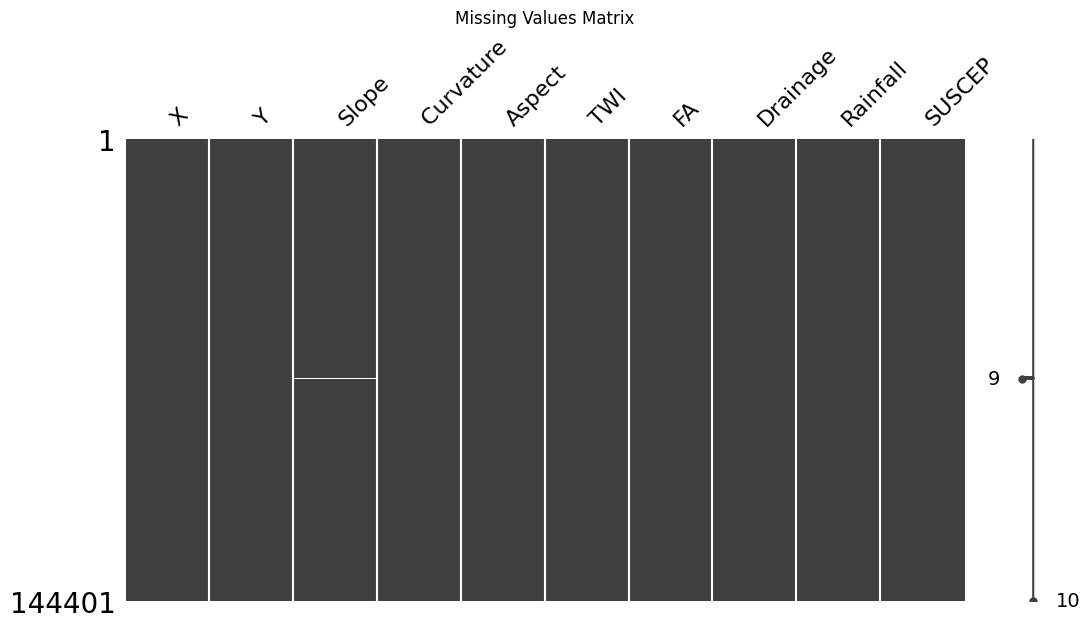

In [5]:
print("📘 Data Info:")
df.info()

print("\n📊 Descriptive Statistics:")
display(df.describe(include='all').transpose())

# Count missing values
print("\n🔍 Missing Values Summary:")
display(df.isnull().sum().sort_values(ascending=False))

# Visualize missing values
msno.matrix(df, figsize=(12,6))
plt.title("Missing Values Matrix")
plt.show()


In [6]:
# Duplicate rows
dup_count = df.duplicated().sum()
print(f"🔁 Duplicate rows: {dup_count}")

# Data types summary
dtype_summary = df.dtypes.value_counts()
print("\n🧩 Data Type Summary:")
print(dtype_summary)

# Convert datetime columns if found
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("\n🕒 Datetime columns converted (if any).")


🔁 Duplicate rows: 0

🧩 Data Type Summary:
float64    9
object     1
Name: count, dtype: int64

🕒 Datetime columns converted (if any).


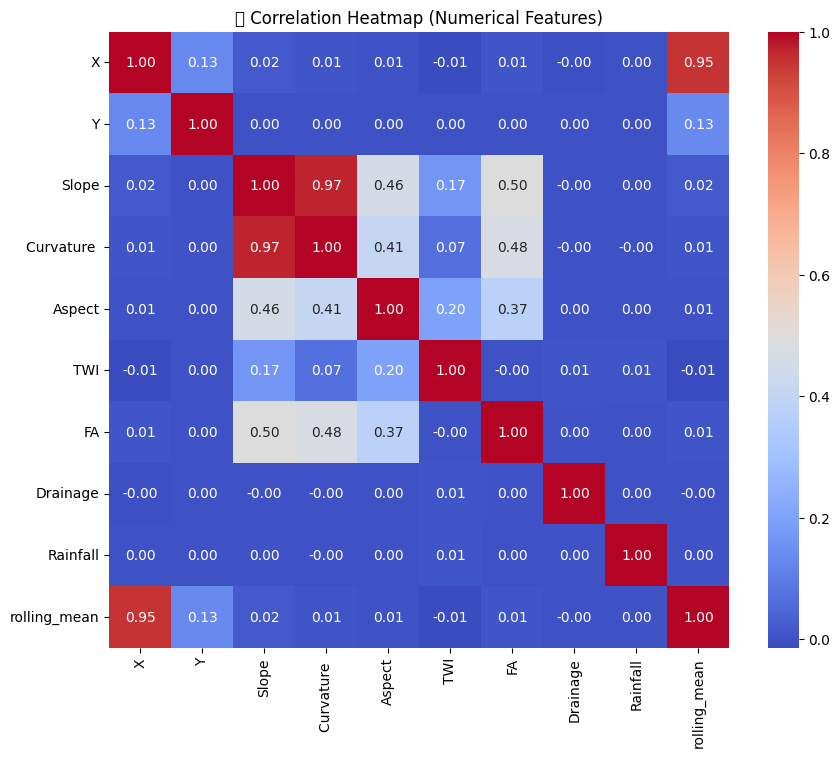

⚠️ No target column detected automatically. You can set one manually.


In [24]:
# Numeric correlations
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("🔗 Correlation Heatmap (Numerical Features)")
plt.show()

# Top 5 correlated features with target (if target known)
target_col = None
for col in df.columns:
    if col.lower() in ['label', 'target', 'risk', 'risk_score', 'flood_risk', 'fire_risk']:
        target_col = col
        break

if target_col:
    print(f"🎯 Target Column detected: {target_col}")
    corr_target = corr[target_col].sort_values(ascending=False)
    display(corr_target.head(10))
else:
    print("⚠️ No target column detected automatically. You can set one manually.")


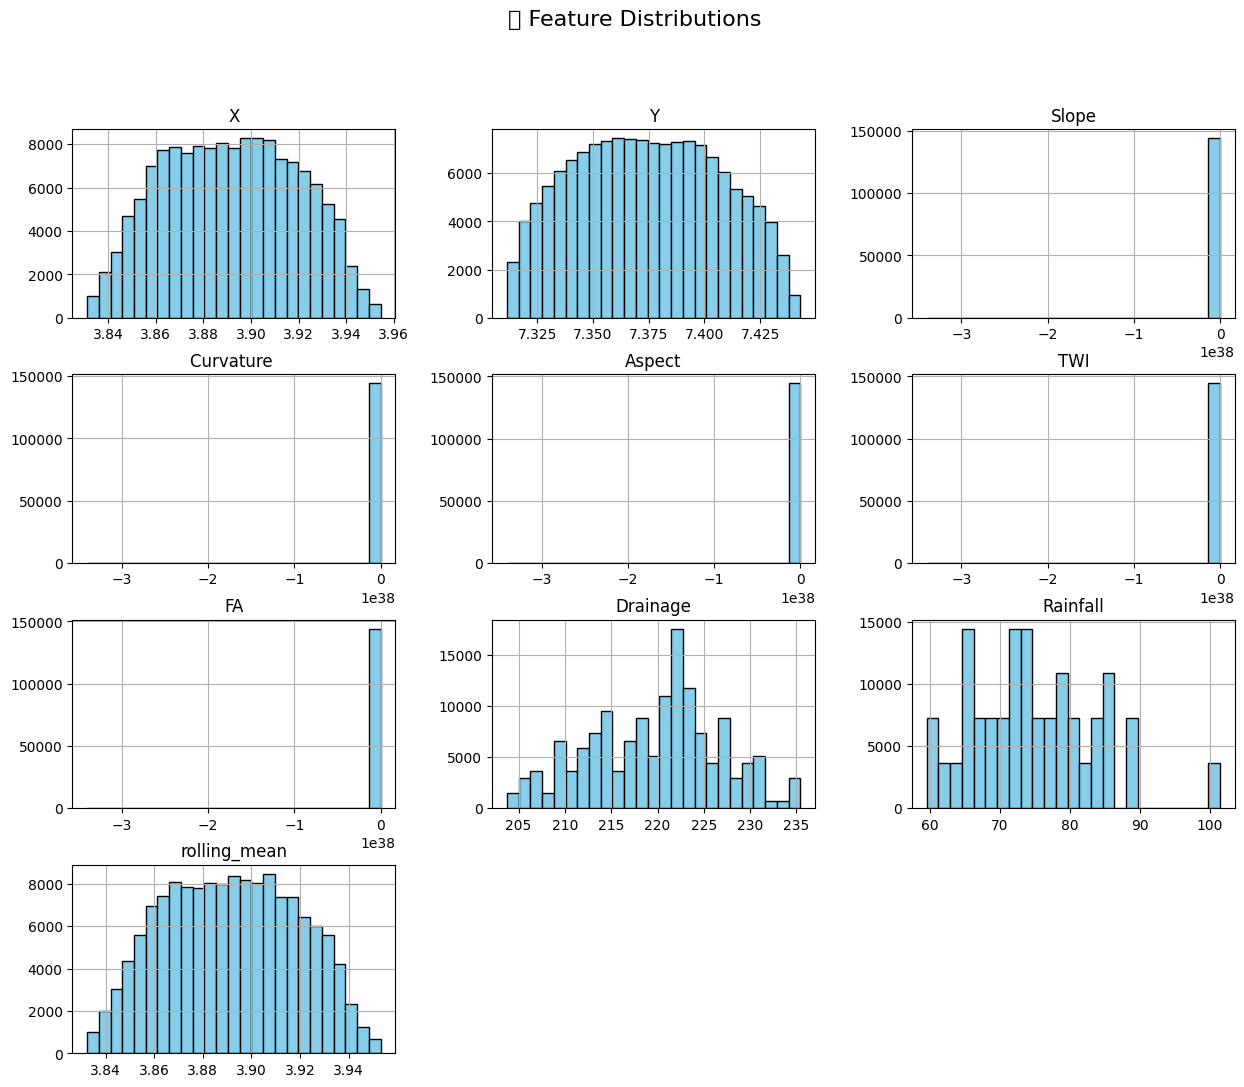

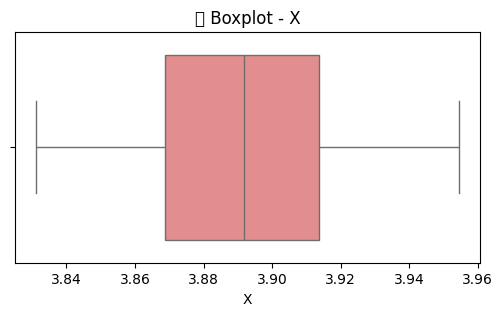

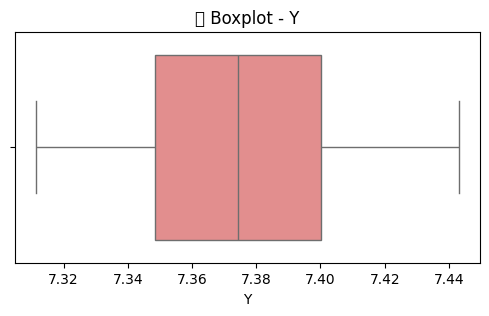

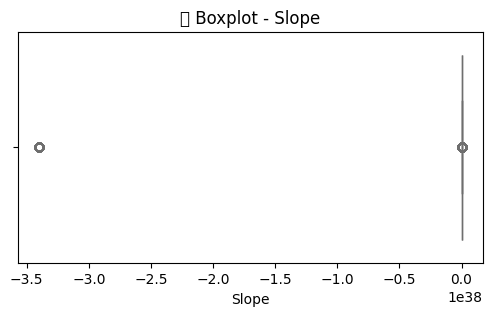

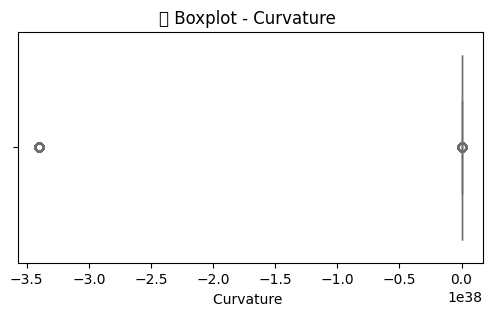

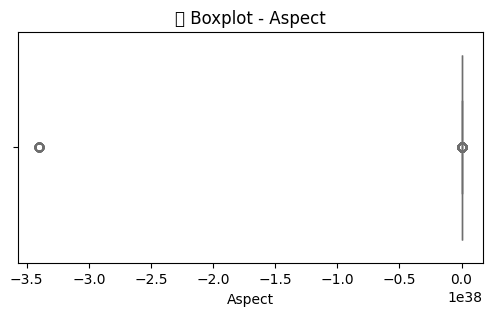

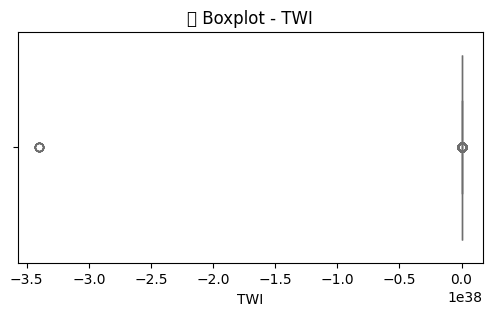

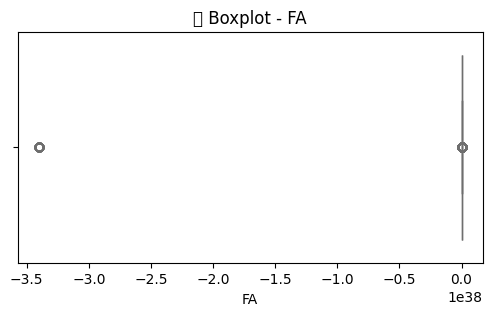

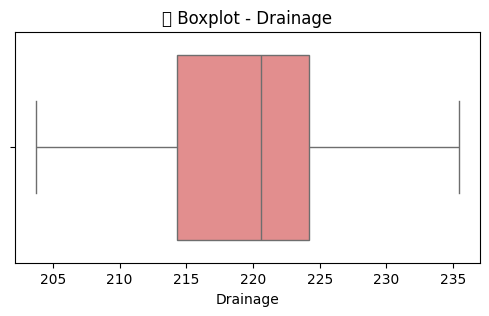

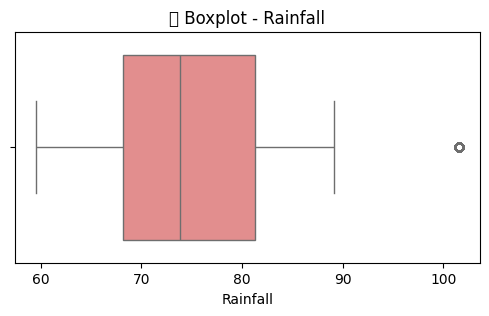

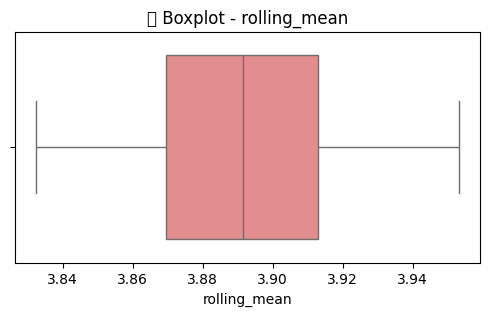

In [25]:
# Histograms for numeric columns
num_cols = num_df.columns.tolist()

df[num_cols].hist(bins=25, figsize=(15,12), color='skyblue', edgecolor='black')
plt.suptitle("📈 Feature Distributions", fontsize=16)
plt.show()

# Boxplots to detect outliers
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f"📦 Boxplot - {col}")
    plt.show()


In [26]:
from scipy import stats

# Detect and count outliers using Z-score
z = np.abs(stats.zscore(num_df, nan_policy='omit'))
outlier_count = (z > 3).sum(axis=0)
outlier_summary = pd.DataFrame({'Feature': num_df.columns, 'OutlierCount': outlier_count})
display(outlier_summary.sort_values('OutlierCount', ascending=False))


,Feature,OutlierCount
8,Rainfall,3611
3,Curvature,354
2,Slope,106
6,FA,90
4,Aspect,71
5,TWI,9
1,Y,0
0,X,0
7,Drainage,0
9,rolling_mean,0


In [27]:
# Detect datetime column
time_col = None
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.datetime64):
        time_col = col
        break

if time_col:
    print(f"🕒 Time Column detected: {time_col}")
    plt.figure(figsize=(12,5))
    df.groupby(df[time_col].dt.to_period('M')).size().plot(kind='bar', color='teal')
    plt.title("📅 Monthly Observation Counts")
    plt.ylabel("Records")
    plt.show()
else:
    print("⚠️ No datetime column found.")


⚠️ No datetime column found.


In [28]:
if set(['latitude','longitude']).issubset(df.columns.str.lower()):
    print("🗺️ Creating map of dataset points...")
    lat_col = [c for c in df.columns if 'lat' in c.lower()][0]
    lon_col = [c for c in df.columns if 'lon' in c.lower()][0]

    m = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=6)
    for _, row in df.sample(min(500, len(df))).iterrows():
        folium.CircleMarker(
            location=[row[lat_col], row[lon_col]],
            radius=2, color='red', fill=True
        ).add_to(m)
    display(m)
else:
    print("⚠️ No geographic coordinate columns detected.")


⚠️ No geographic coordinate columns detected.


In [29]:
# Quick feature importance using RandomForest (if target exists)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

if target_col:
    X = df.select_dtypes(include=np.number).drop(columns=[target_col])
    y = df[target_col]
    if len(y.unique()) <= 10:
        model = RandomForestClassifier()
    else:
        model = RandomForestRegressor()
    model.fit(X.fillna(0), y)
    imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    imp = imp.sort_values('Importance', ascending=False)
    px.bar(imp, x='Feature', y='Importance', title='🔥 Feature Importance').show()
else:
    print("Set `target_col` manually to compute feature importance.")


Set `target_col` manually to compute feature importance.


In [30]:
# Fill missing numeric values with median, encode categoricals
df_clean = df.copy()

for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Encode categorical
for col in df_clean.select_dtypes(include='object').columns:
    if df_clean[col].nunique() < 30:
        df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

CLEAN_PATH = DATA_PATH.replace(".csv", "_cleaned.csv")
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"✅ Cleaned data saved to: {CLEAN_PATH}")


✅ Cleaned data saved to: /content/Pluvial_Flood_Dataset.xlsx


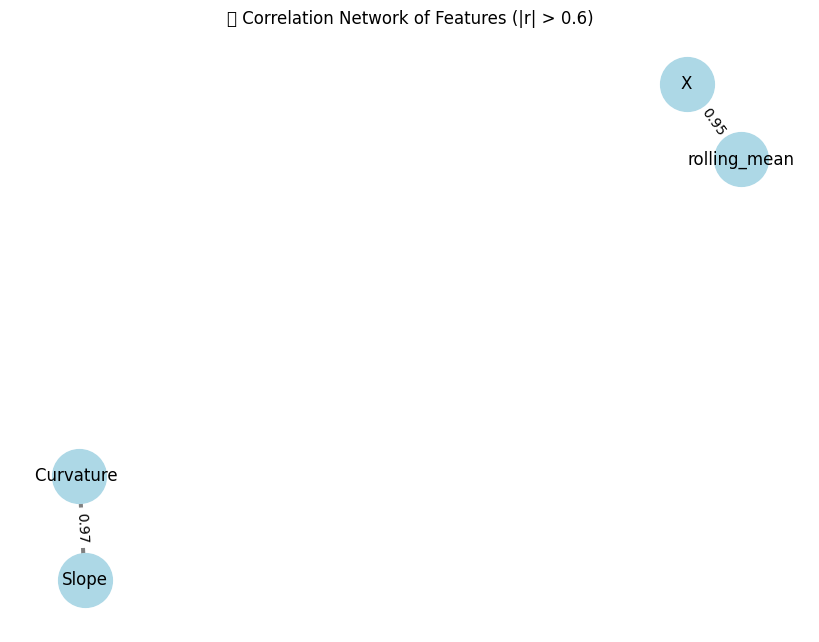

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=np.number).corr()
G = nx.Graph()

for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > 0.6:
            G.add_edge(i, j, weight=round(corr.loc[i, j], 2))

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
weights = [abs(G[u][v]['weight'])*3 for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', width=weights, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})
plt.title("🌐 Correlation Network of Features (|r| > 0.6)")
plt.show()


In [32]:
time_col = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
if time_col:
    time_col = time_col[0]
    df[time_col] = pd.to_datetime(df[time_col])
    key_vars = [c for c in df.columns if c.lower() in ['rainfall_mm','temperature','humidity','river_level_m','ndvi']]
    if key_vars:
        fig = px.line(df.sort_values(time_col), x=time_col, y=key_vars,
                      title="📈 Temporal Trends of Key Parameters",
                      labels={'value':'Measurement','variable':'Feature'})
        fig.update_layout(template='plotly_white')
        fig.show()


In [33]:
if set(['latitude','longitude']).issubset(df.columns.str.lower()):
    lat_col = [c for c in df.columns if 'lat' in c.lower()][0]
    lon_col = [c for c in df.columns if 'lon' in c.lower()][0]
    value_col = None
    for col in df.columns:
        if 'risk' in col.lower() or 'score' in col.lower():
            value_col = col
            break

    if value_col:
        fig = px.density_mapbox(df, lat=lat_col, lon=lon_col, z=value_col,
                                radius=10, center=dict(lat=df[lat_col].mean(), lon=df[lon_col].mean()),
                                zoom=5, mapbox_style="stamen-terrain",
                                title=f"🔥 {value_col.upper()} Geospatial Heatmap")
        fig.show()


In [34]:
if target_col:
    top_corr = corr[target_col].sort_values(ascending=False).index[1:5]
    for col in top_corr:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y=target_col, hue=target_col, palette='coolwarm')
        plt.title(f"💬 Relationship: {col} vs {target_col}")
        plt.show()


In [35]:
if target_col:
    df['risk_level'] = pd.cut(df[target_col], bins=[0,0.4,0.7,1], labels=['Low','Moderate','High'])
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='risk_level', palette=['#b3e6b3','#ffe680','#ff6666'])
    plt.title("🧭 Distribution of Risk Levels")
    plt.xlabel("Risk Category")
    plt.ylabel("Count")
    plt.show()


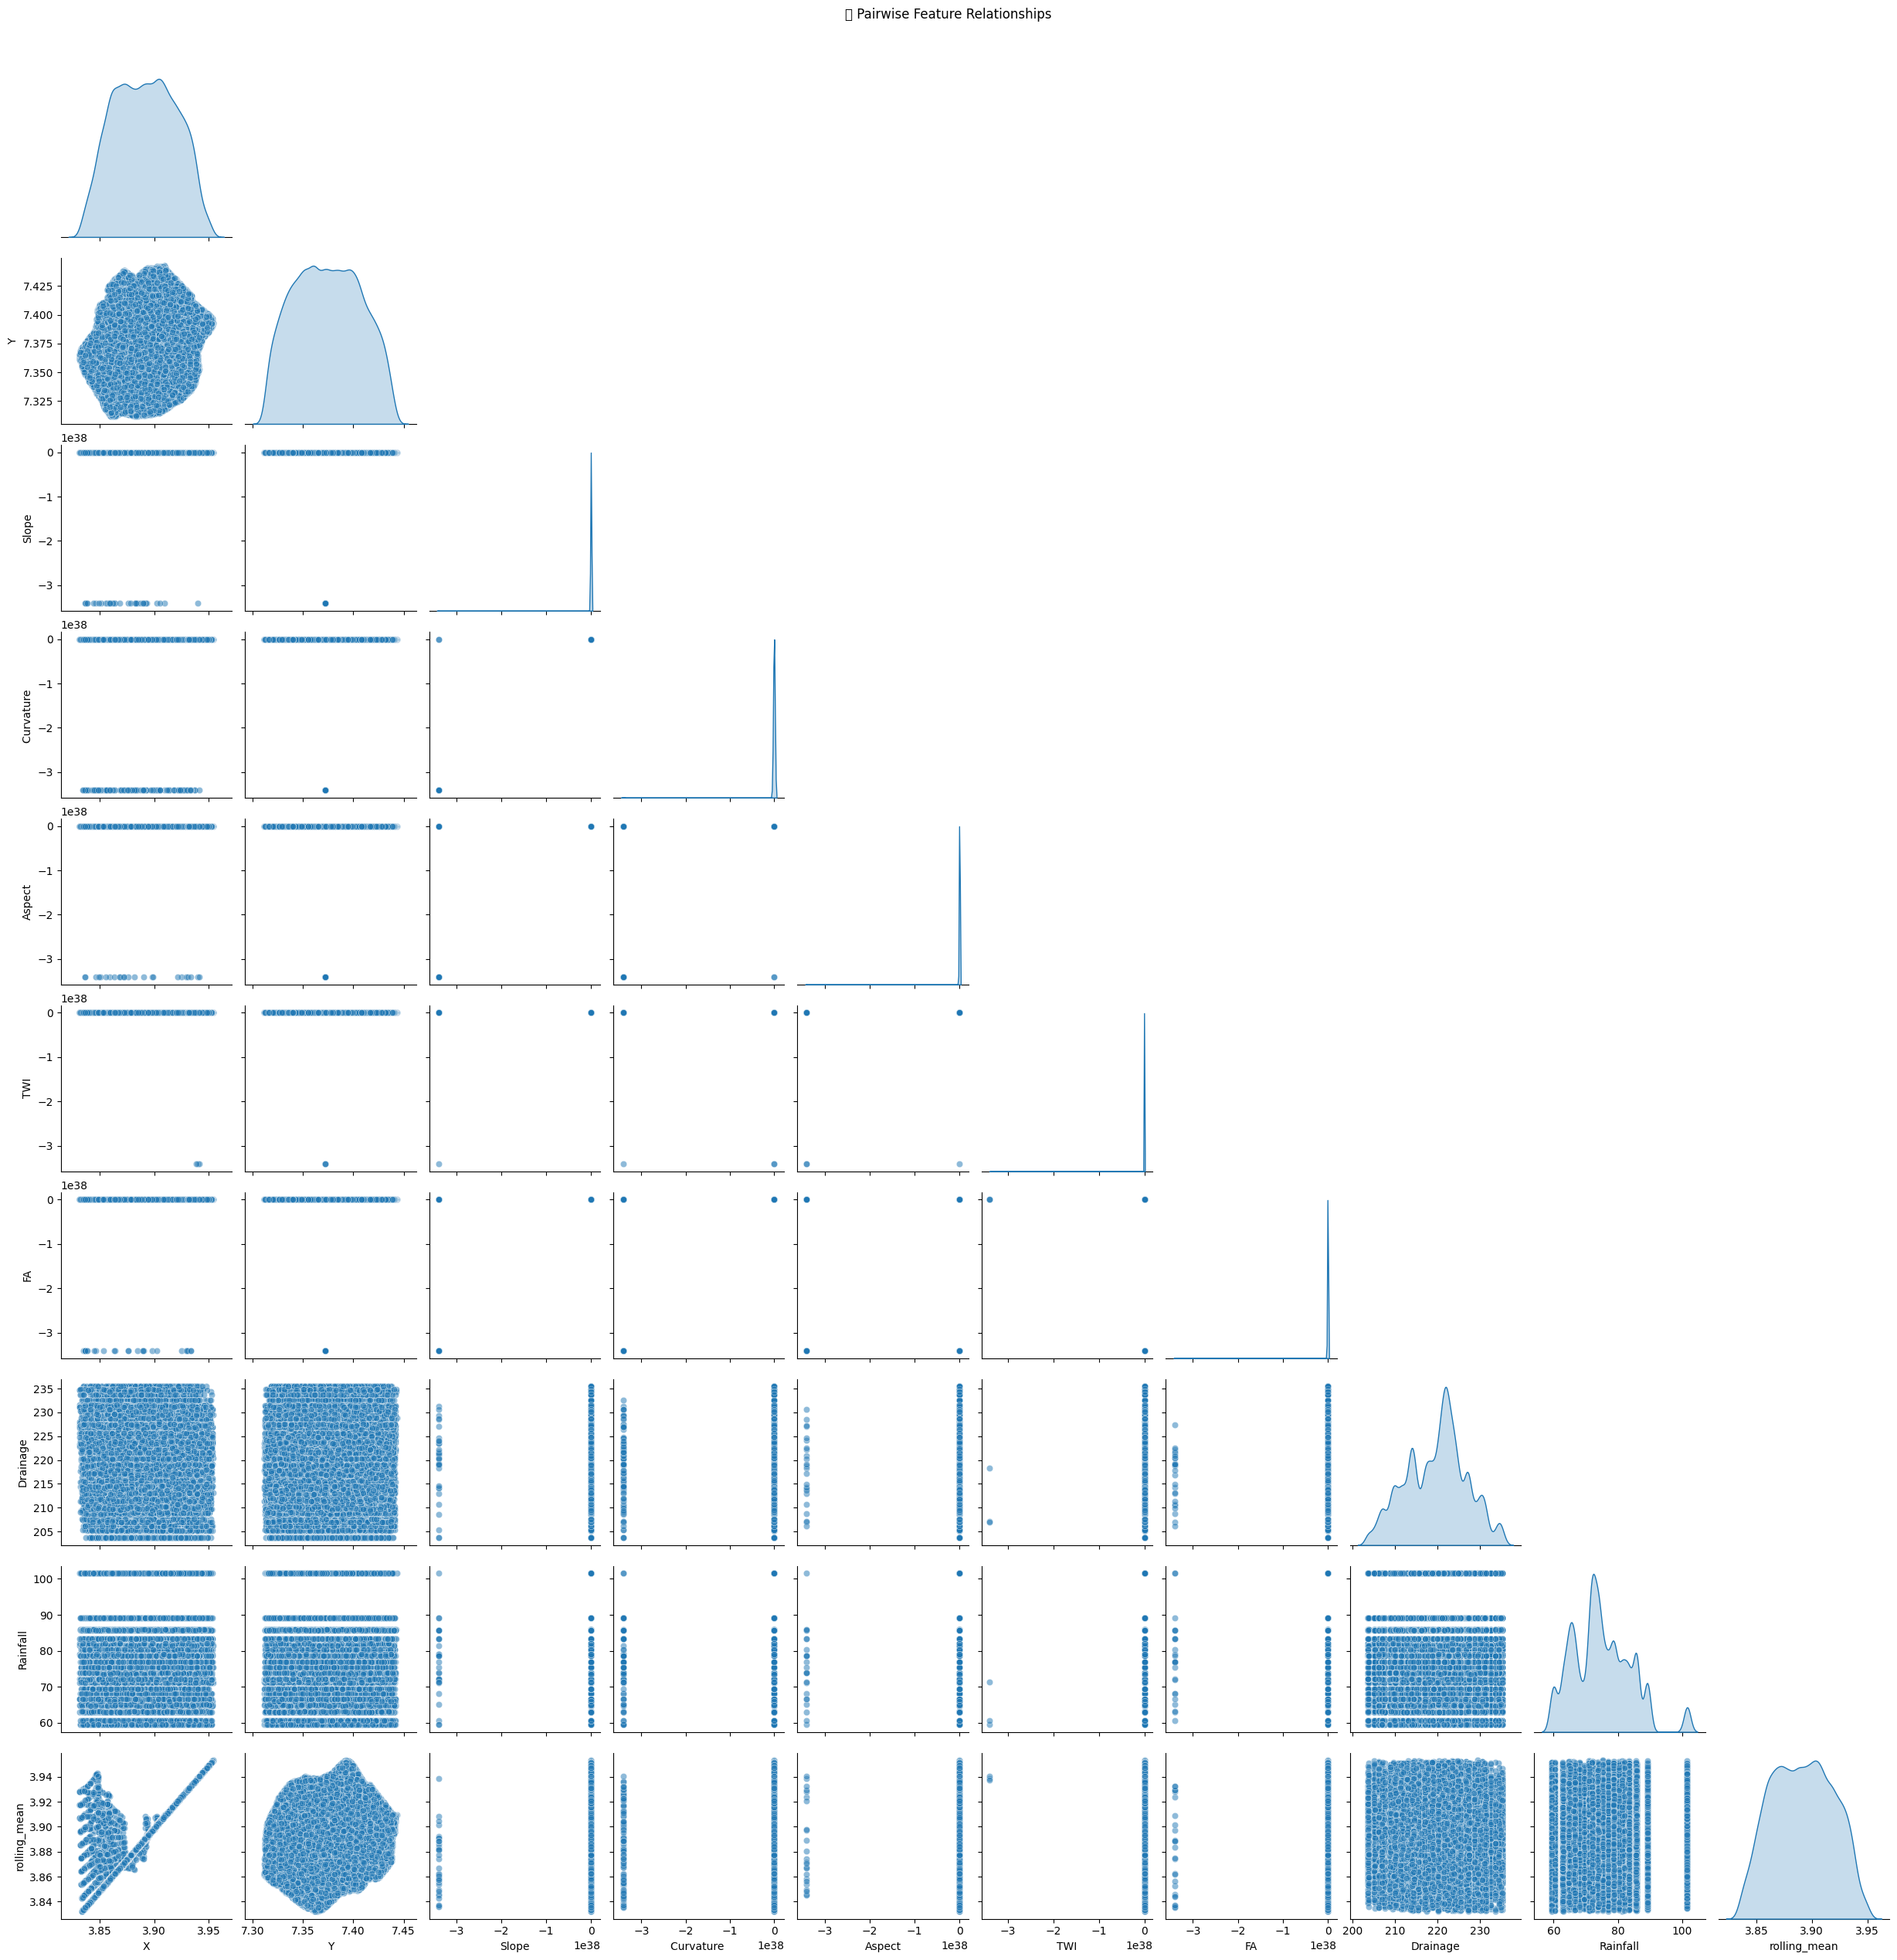

In [36]:
subset = df.select_dtypes(include=np.number).sample(frac=0.3, random_state=42)
sns.pairplot(subset, diag_kind='kde', corner=True, plot_kws={'alpha':0.5})
plt.suptitle("🔍 Pairwise Feature Relationships", y=1.02)
plt.show()


In [37]:
if time_col:
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month
    pivot = df.pivot_table(index='month', columns='year', values='rainfall_mm', aggfunc='mean')
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.title("🌦️ Monthly Average Rainfall by Year")
    plt.ylabel("Month")
    plt.xlabel("Year")
    plt.show()


In [38]:
if 'fire_risk' in df.columns or 'hotspots' in df.columns:
    val_col = 'fire_risk' if 'fire_risk' in df.columns else 'hotspots'
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[val_col], fill=True, color='orange', bw_adjust=0.3)
    plt.title("🔥 Fire Risk Density Distribution")
    plt.xlabel(val_col)
    plt.show()


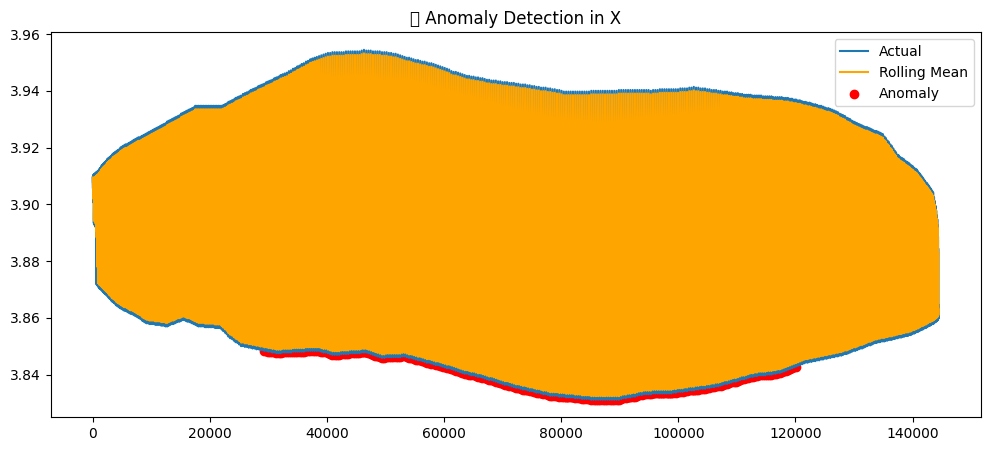

In [39]:
col = 'rainfall_mm' if 'rainfall_mm' in df.columns else df.select_dtypes(include=np.number).columns[0]
df['rolling_mean'] = df[col].rolling(window=10, min_periods=1).mean()
df['anomaly'] = np.abs(df[col] - df['rolling_mean']) > 3 * df[col].std()

plt.figure(figsize=(12,5))
plt.plot(df[col], label='Actual')
plt.plot(df['rolling_mean'], label='Rolling Mean', color='orange')
plt.scatter(df.index[df['anomaly']], df[col][df['anomaly']], color='red', label='Anomaly')
plt.title(f"🚨 Anomaly Detection in {col}")
plt.legend()
plt.show()
